https://data.mendeley.com/datasets/992mh7dk9y/2

https://github.com/AjNavneet/Insurance-Price-Forecast-XGBoost-Regression/blob/master/lib/insurance_pricing_forecast.ipynb

https://aab11e6.github.io/Insurance-claims/data.html?utm_source=chatgpt.com

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import missingno as msno
import plotly.express as px
import plotly.io as pio
import os
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from scipy.stats import chi2_contingency

df = pd.read_csv(r"D:\Project\Insurance\Data\insurance_claims.csv")
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-09-06           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                       ?               5070          780   
2       430632  ...                      NO              34650         7700   
3       608117  ...                      NO              63400         6340   
4       610706  ...                      NO               6500         1300   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 40 columns]

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [56]:
print(f"Df dim:{df.shape}")

#this df uses "?" for missing values instead of NaN 
df=df.replace("?",np.nan)

nan_count = df.isna().sum().sort_values(ascending=False)
print(nan_count)



Df dim:(1000, 40)
_c39                           1000
property_damage                 360
police_report_available         343
collision_type                  178
authorities_contacted            91
bodily_injuries                   0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
fraud_reported                    0
auto_year                         0
auto_model                        0
total_claim_amount                0
injury_claim                      0
property_claim                    0
vehicle_claim                     0
auto_make                         0
witnesses                         0
months_as_customer                0
age                               0
insured_zip                       0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_ded

There are 0 duplicates in the dataset.


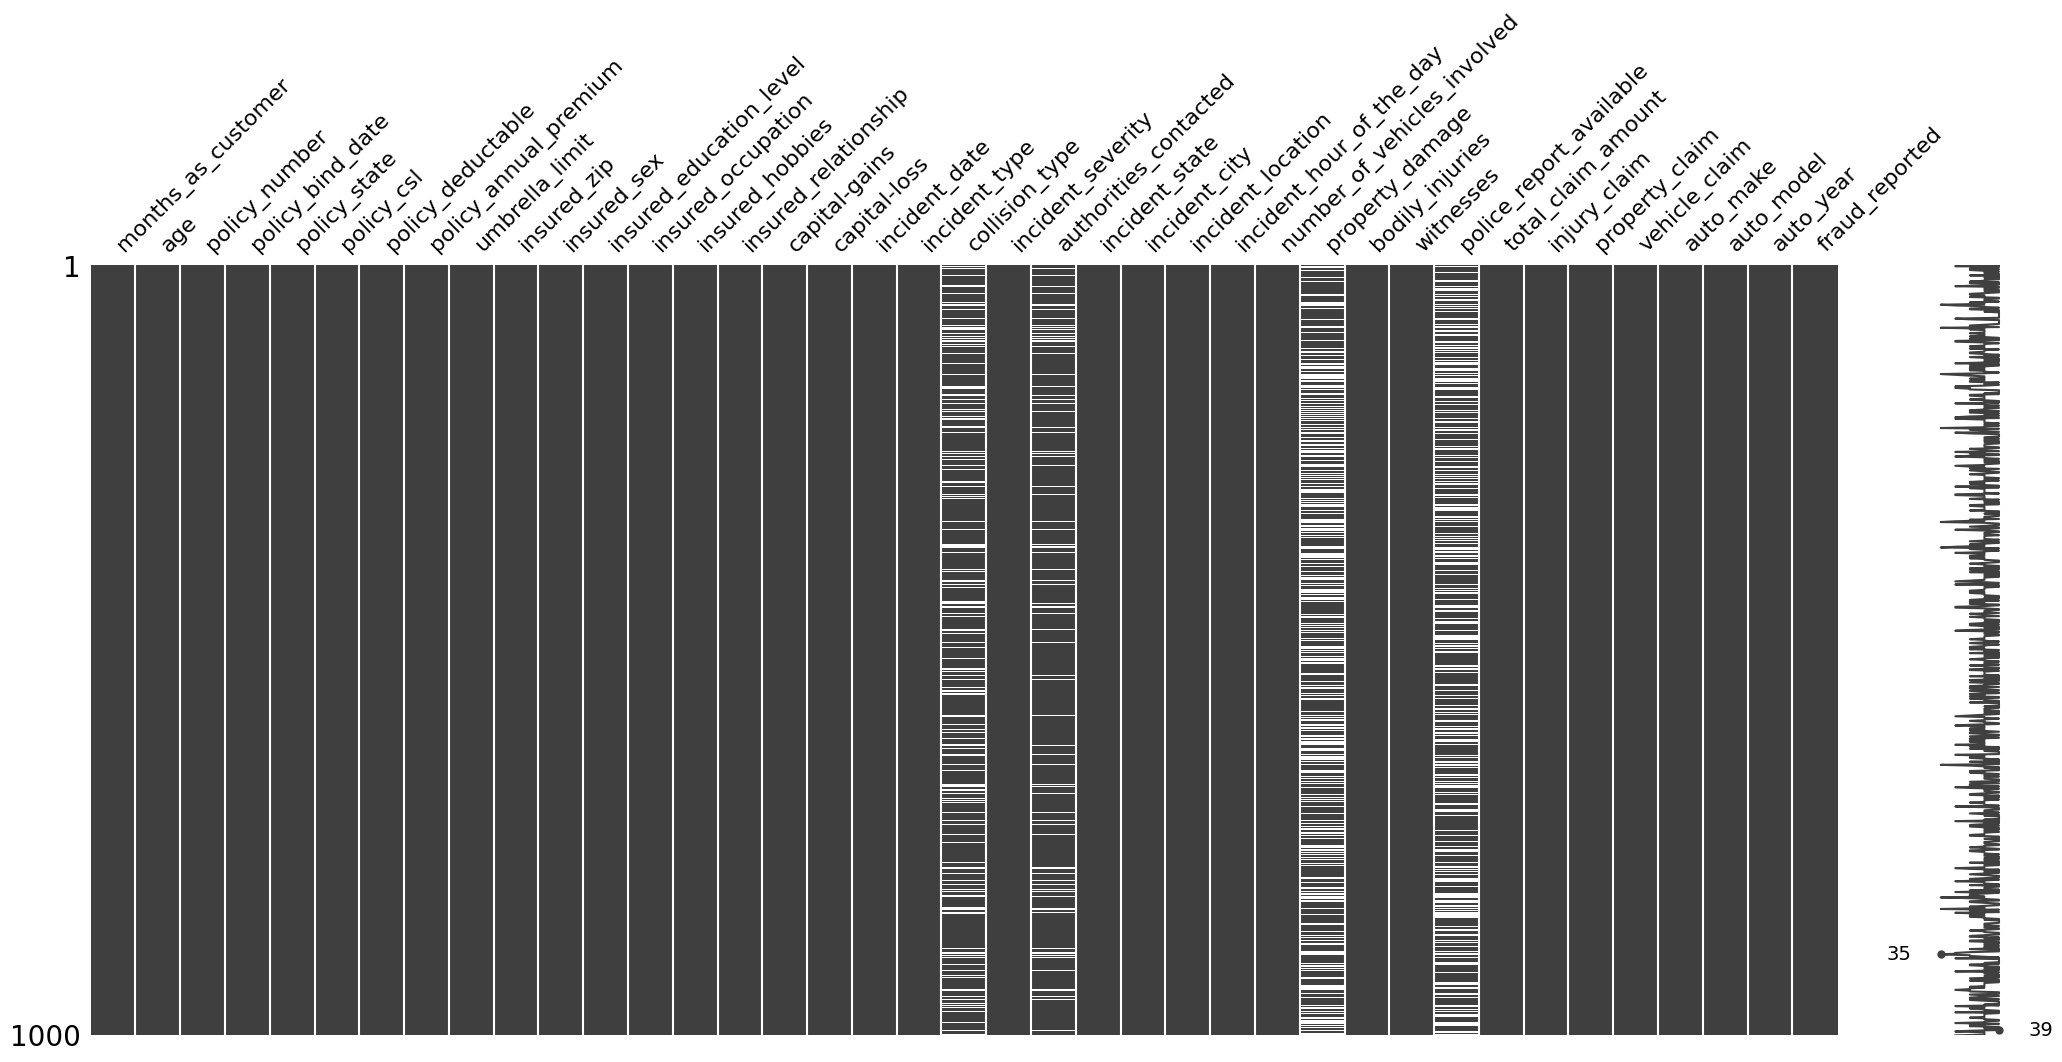

In [57]:
df.drop("_c39", axis=1, inplace=True)
df.columns

#visualizing missing values 
msno.matrix(df)

#checking for duplicates
dupe_count=df["policy_number"].duplicated().sum()
print(f"There are {dupe_count} duplicates in the dataset.")

EDA

In [58]:
#time series, choropleth?

In [59]:
#checking to see if there are enough fraud instances to train on
print(df["fraud_reported"].value_counts())
numerical_cols = df.select_dtypes(include=["int64","float64"]).columns.tolist()
catagorical_cols = df.select_dtypes(include=["object"]).columns.tolist()
df.describe()

fraud_reported
N    753
Y    247
Name: count, dtype: int64


months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count    1000.000000               1000.000000                   1000.00000   
mean   -26793.700000                 11.644000                      1.83900   
std     28104.096686                  6.951373                      1.01888   
min   -111100.000000                  0.000000                      1.00000   
25%    -51500.000000                  6.000000                      1.00000   
50%    -23250.000000                 12.000000                      1.00000   
75%         0.000000                 17.000000                      3.00000   
max         0.000000                 23.000000                      4.00000   

       bodily_injuries    witnesses  total_claim_amount  injury_claim  \
count      1000.000000  1000.000000          1000.00000   1000.000000   
mean          0.992000     1.487000         52761.94000   7433.420000   
std           0.820127     1.111335         26401.53319   4880.951853   
min           0.000000     0.000000           100.00000      0.000000   
25%           0.000000     1.000000         41812.50000   4295.000000   
50%           1.000000     1.000000         58055.00000   6775.000000   
75%           2.000000     2.000000         70592.50000  11305.000000   
max           2.000000     3.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_year  
count     1000.000000    1000.000000  1000.000000  
mean      7399.570000   37928.950000  2005.103000  
std       4824.726179   18886.252893     6.015861  
min          0.000000      70.000000  1995.000000  
25%       4445.000000   30292.500000  2000.000000  
50%       6750.000000   42100.000000  2005.000000  
75%      10885.000000   50822.500000  2010.000000  
max      23670.000000   79560.000000  2015.000000

Bivariate Analysis
-divide into quantative and qualitative data

Quantitative:
-check for colinearity
-update corr plot to show hue of fraud_reported

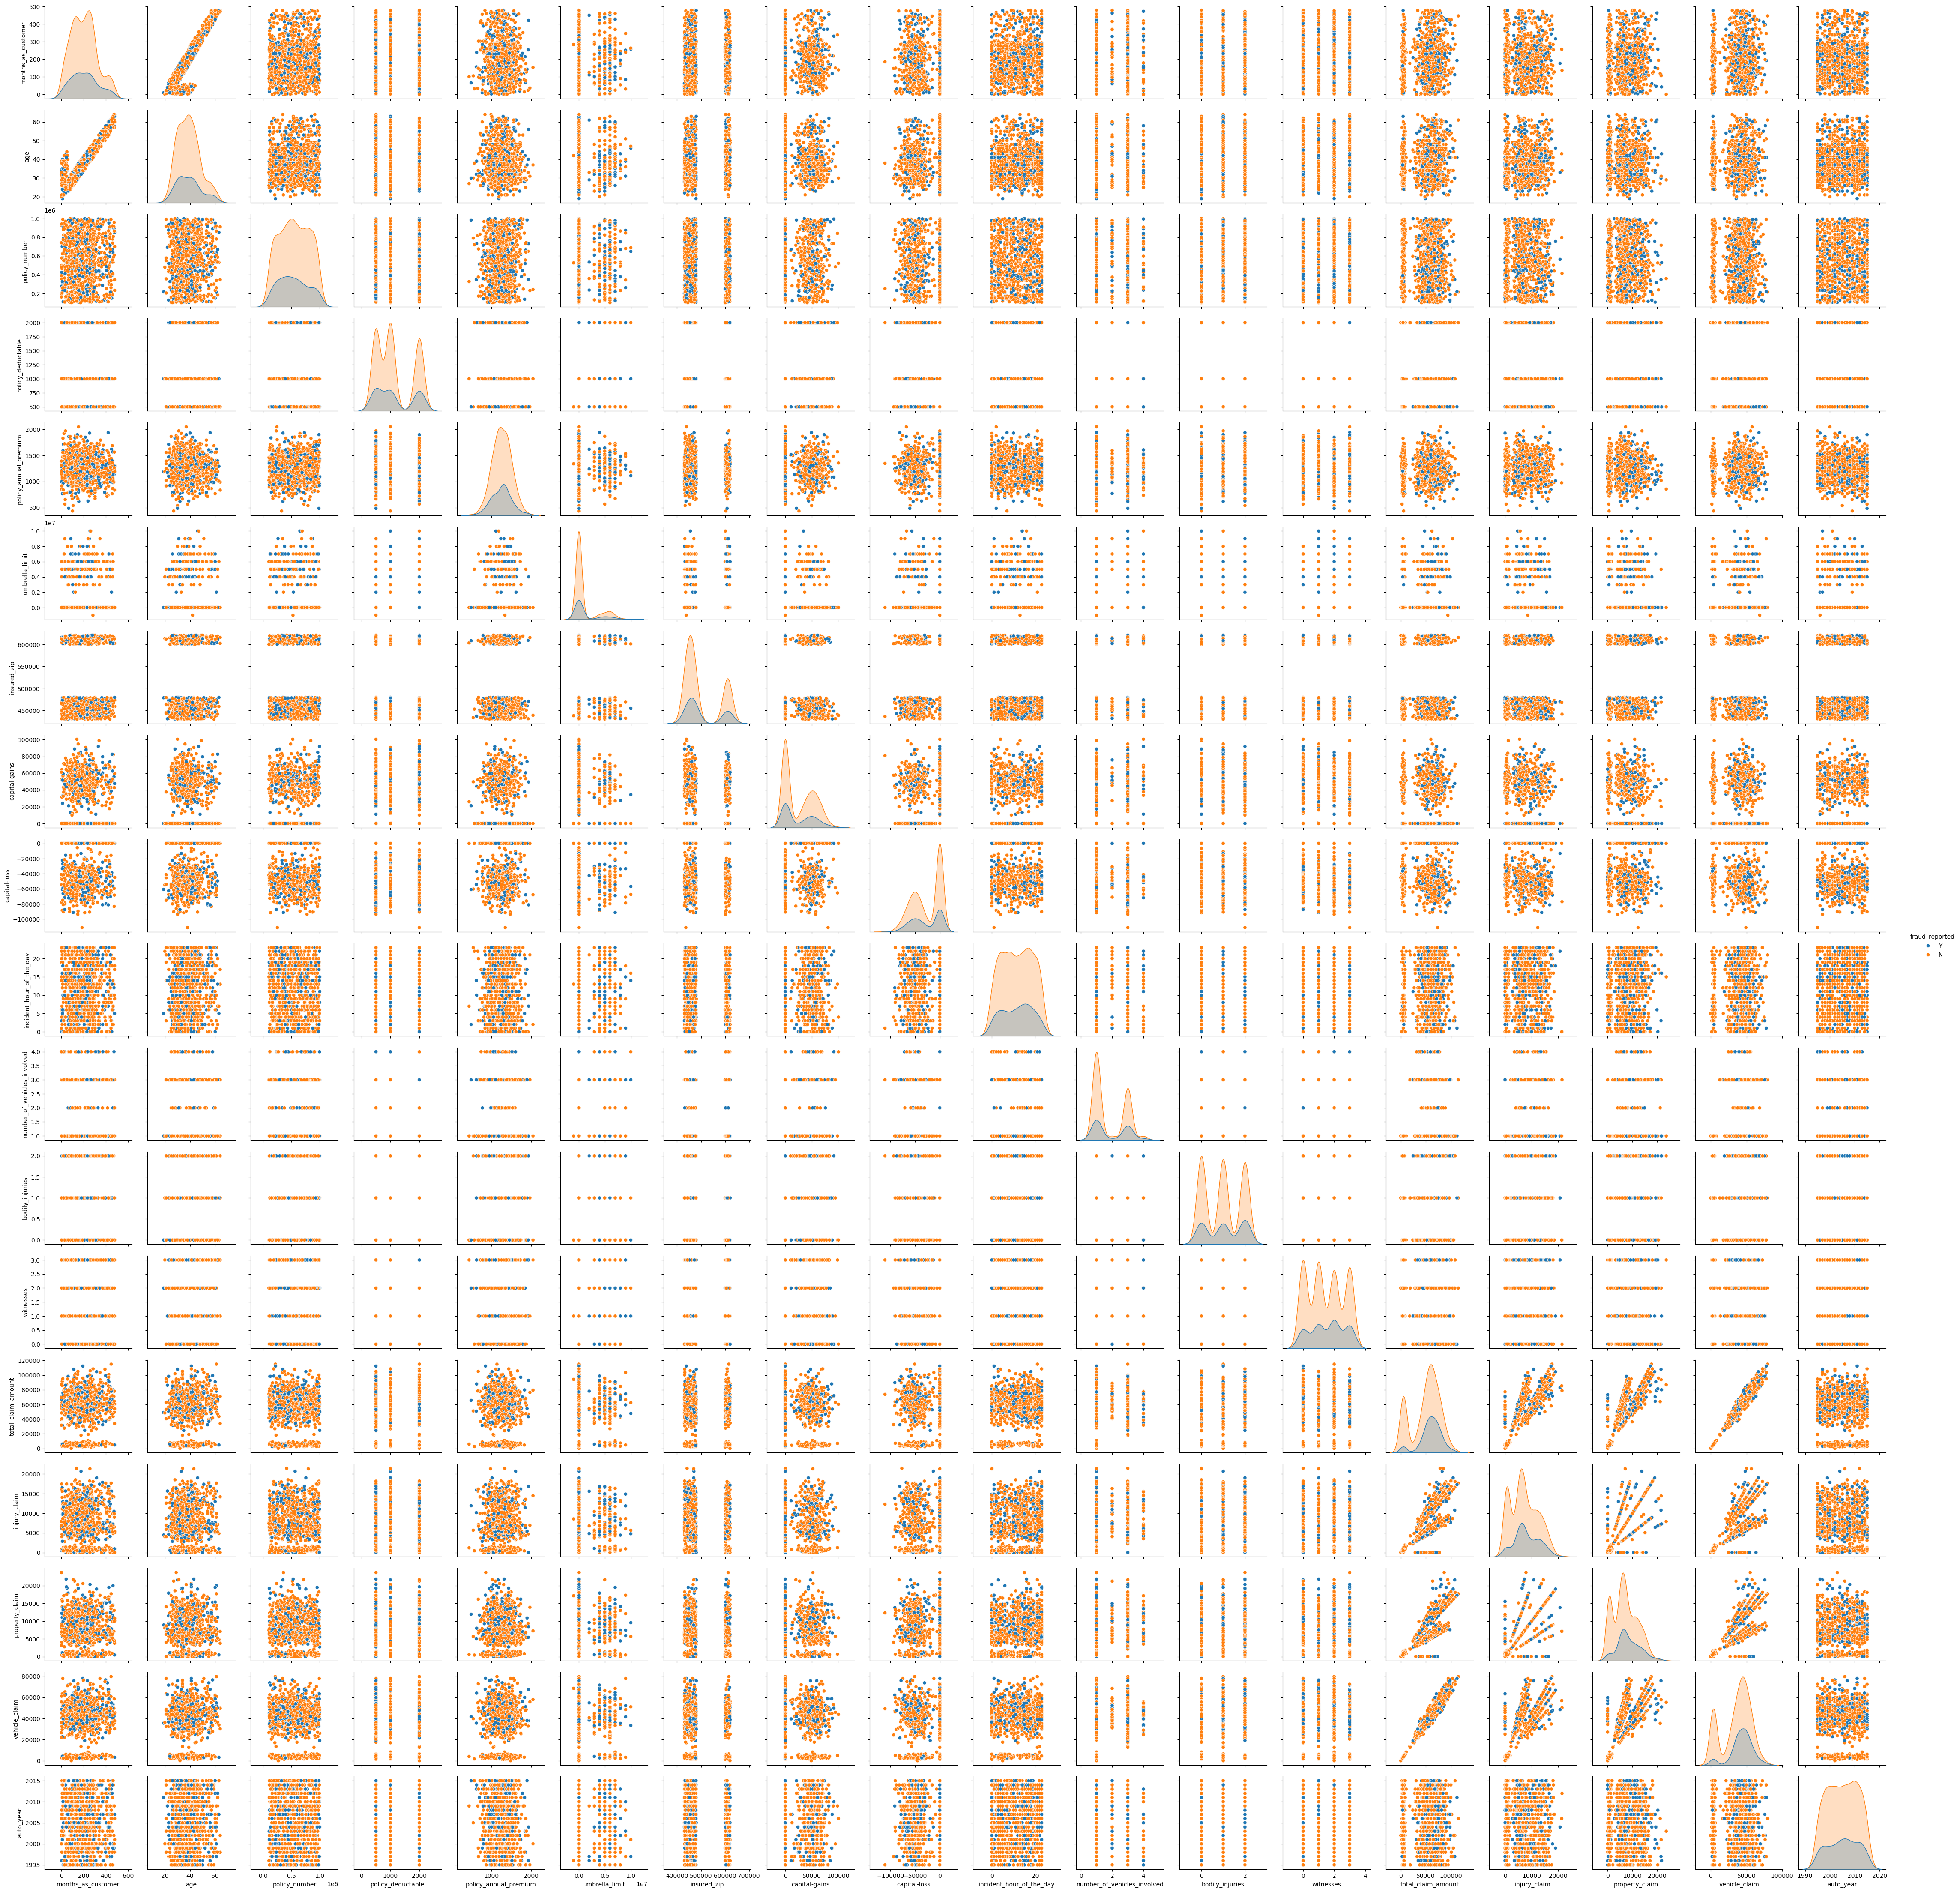

In [ ]:
#blue=fraud, orange=non_fraud
sns.pairplot(df,vars=numerical_cols,hue="fraud_reported")

In [61]:

fraud_true=247
fraud_false=75
save_location=r"D:\Project\Insurance\Figures\Histograms"
def generate_hists(df, variable, save_location, fraud_col="fraud_reported"):
    """
    Generate and save a normalized histogram for a numeric variable,
    comparing fraud vs non-fraud distributions.

    Parameters
    ----------
    df : pd.DataFrame
        The dataset.
    variable : str
        Column name to plot.
    save_location : str
        Folder to save the figure.
    fraud_col : str, optional
        Name of the fraud indicator column (default "fraud_reported").
    """
    os.makedirs(save_location, exist_ok=True)

    fraud_true = df[df[fraud_col] == "Y"][variable]
    fraud_false = df[df[fraud_col] == "N"][variable]

    
    n_true, n_false = len(fraud_true), len(fraud_false)


    bins = np.linspace(df[variable].min(), df[variable].max(), 50)

    # Compute normalized histograms
    hist_Y, _ = np.histogram(fraud_true, bins=bins)
    hist_N, _ = np.histogram(fraud_false, bins=bins)
    normalized_hist_Y = hist_Y / n_true
    normalized_hist_N = hist_N / n_false

    # Plot
    plt.figure(figsize=(10, 6))
    plt.bar(bins[:-1], normalized_hist_Y, width=np.diff(bins),
            alpha=0.6, label="Fraud Reported (Y)")
    plt.bar(bins[:-1], normalized_hist_N, width=np.diff(bins),
            alpha=0.6, label="Fraud Not Reported (N)")

    plt.title(f"Normalized Distribution of {variable}")
    plt.xlabel(variable)
    plt.ylabel("Normalized Frequency")
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Save to file
    fig_path = os.path.join(save_location, f"{variable}_hist.png")
    plt.tight_layout()
    plt.savefig(fig_path, dpi=300)
    plt.close()
# Generate histograms for all numeric columns
for col in numerical_cols:
    generate_hists(df, col, save_location)



In [62]:
from scipy.stats import shapiro
#testing for normality among numeric columns
for col in numerical_cols:
    stat, p = shapiro(df[col].dropna().sample(500) if len(df) > 500 else df[col].dropna())
    print(f"{col}: p = {p:.4f}")
#all but one appear to be normally distributed



months_as_customer: p = 0.0000
age: p = 0.0000
policy_number: p = 0.0000
policy_deductable: p = 0.0000
policy_annual_premium: p = 0.8854
umbrella_limit: p = 0.0000
insured_zip: p = 0.0000
capital-gains: p = 0.0000
capital-loss: p = 0.0000
incident_hour_of_the_day: p = 0.0000
number_of_vehicles_involved: p = 0.0000
bodily_injuries: p = 0.0000
witnesses: p = 0.0000
total_claim_amount: p = 0.0000
injury_claim: p = 0.0000
property_claim: p = 0.0000
vehicle_claim: p = 0.0000
auto_year: p = 0.0000


In [ ]:
#using variance inflation factor to check for multicollinearity
# Select only numeric predictors
X = df[numerical_cols]

# Add constant term for statsmodels
X = add_constant(X)

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data = vif_data.sort_values("VIF", ascending=False)
print(vif_data)

#should remove total_claim_amount since it is a sum of other columns and might lead to 

                        feature           VIF
17                vehicle_claim           inf
16               property_claim           inf
15                 injury_claim           inf
14           total_claim_amount           inf
0                         const  1.132633e+05
2                           age  6.790447e+00
1            months_as_customer  6.773985e+00
11  number_of_vehicles_involved  1.099172e+00
10     incident_hour_of_the_day  1.068207e+00
13                    witnesses  1.023967e+00
4             policy_deductable  1.022263e+00
8                 capital-gains  1.016501e+00
9                  capital-loss  1.015597e+00
18                    auto_year  1.015469e+00
5         policy_annual_premium  1.012599e+00
7                   insured_zip  1.012211e+00
12              bodily_injuries  1.011926e+00
6                umbrella_limit  1.007713e+00
3                 policy_number  1.005807e+00


C:\Users\ethan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


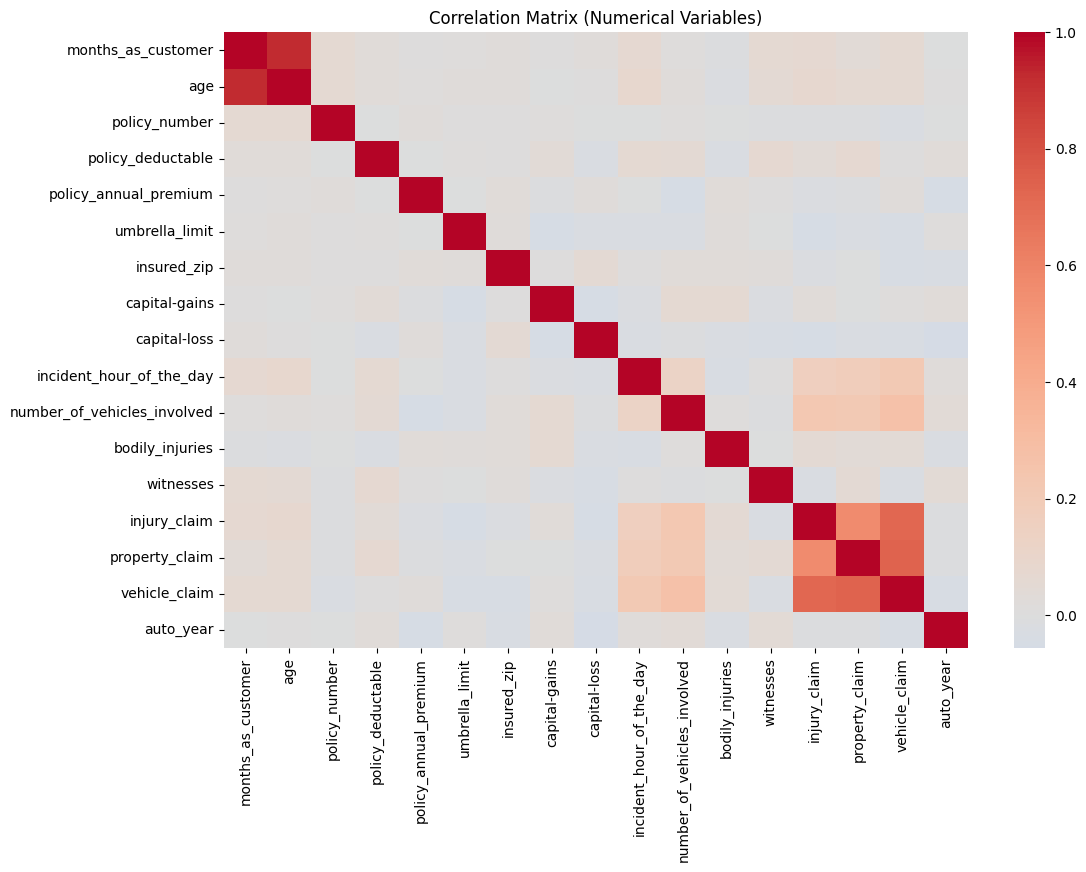

In [67]:
#Dropping total_claim_amount to reduce 
df.drop("total_claim_amount",axis=1,inplace=True)
#most cols arent not normally distributed so using spearman
df.corr(method="spearman", numeric_only=True)
#drop total claim since it is a sum of other columns and we loose info from it
corr = df.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap="coolwarm", center=0, annot=False)
plt.title("Correlation Matrix (Numerical Variables)")
plt.show()

Qualitative:
-chi squared for missing values
-see if hobbies is significant 

In [ ]:
#checking to see if missing values are significant
incomplete_cols = [
    "property_damage",
    "police_report_available",
    "collision_type",
    "authorities_contacted"
]
print(f"Chi-Squared Test for cols with missing values:")

for col in incomplete_cols:
    contingency_table = pd.crosstab(df[col], df["fraud_reported"])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"{col}:  p-value = {p}")
print("\nMissing values are significant so I will keep them.")

df=df.replace(np.nan,"?")

Chi-Squared Test for cols with missing values:
property_damage:  p-value = 0.0701595876811322
police_report_available:  p-value = 0.5818981002510618
collision_type:  p-value = 0.29854074330109365
authorities_contacted:  p-value = 0.040573867567454534

Missing values are significant so I will keep them.


In [ ]:
#See if hobbies are significant

property_damage
?      360
NO     338
YES    302
Name: count, dtype: int64

Making features:
car model
car age

Encoding